In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xml.etree import ElementTree

In [2]:
tree = ElementTree.parse('electric power.xml')

In [3]:
root = tree.getroot()

In [4]:
A = np.empty((len(root), 3), dtype=object)
for i in range(A.shape[0]):
    for j in range(3):
        A[i][j] = root[i][j].text
A

array([['243887', '01.01.2009 0:00:00.000000', '1'],
       ['243068', '01.01.2009 0:00:00.000000', '2'],
       ['242266', '01.01.2009 0:00:00.000000', '3'],
       ...,
       ['369646', '31.12.2010 0:00:00.000000', '22'],
       ['365917', '31.12.2010 0:00:00.000000', '23'],
       ['362311', '31.12.2010 0:00:00.000000', '24']], dtype=object)

In [5]:
df = pd.DataFrame(data=A, columns=['target', 'date', 'hour'])
df

,target,date,hour
0,243887,01.01.2009 0:00:00.000000,1
1,243068,01.01.2009 0:00:00.000000,2
2,242266,01.01.2009 0:00:00.000000,3
3,242659,01.01.2009 0:00:00.000000,4
4,243724,01.01.2009 0:00:00.000000,5
...,...,...,...
17513,371835,31.12.2010 0:00:00.000000,20
17514,370674,31.12.2010 0:00:00.000000,21
17515,369646,31.12.2010 0:00:00.000000,22
17516,365917,31.12.2010 0:00:00.000000,23


In [6]:
df['target'] = df['target'].astype(float)
df['date'] = df['date'].astype('datetime64')
df['hour'] = df['hour'].astype(int)

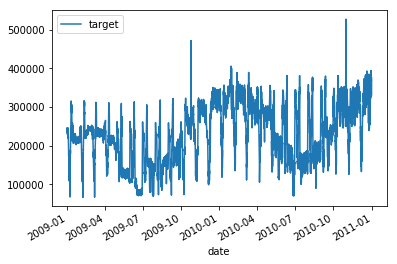

In [7]:
df.plot(x='date', y='target')

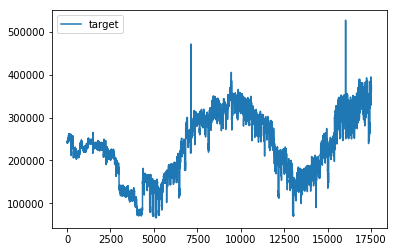

In [8]:
df.plot(y='target')

In [9]:
data = df.groupby(by='date').sum()
del data['hour']
data

,target
date,
2009-01-01,5830312.0
2009-01-02,5597619.0
2009-01-03,5825879.0
2009-01-04,5410538.0
2009-01-05,4225877.0
...,...
2010-12-27,6624696.0
2010-12-28,7543819.0
2010-12-29,8790105.0


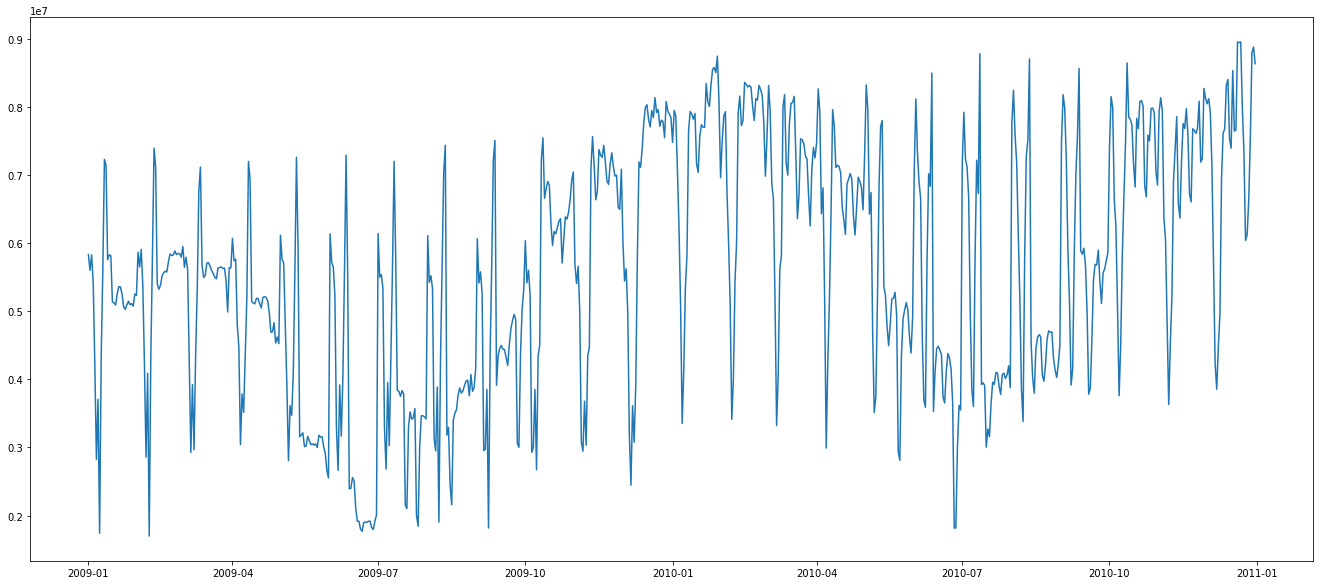

In [10]:
plt.figure(figsize=(23, 10))
plt.plot(data['target'])

In [11]:
data['day_num'] = range(1,731)
#data1 = data[data['day_num'] <= 723]
data['date'] = data.index
data.index = data['day_num']
data.index.name = 'Id'

"""from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(
                          # Максимальная степень
                          degree=6,
                          # Не генерировать свободный член
                          include_bias=True)
data1 = poly.fit_transform(data[['day_num']])
data1 = pd.DataFrame(data1, columns=[str(i) for i in range(1, 8)])
"""

"from sklearn.preprocessing import PolynomialFeatures\npoly = PolynomialFeatures(\n                          # Максимальная степень\n                          degree=6,\n                          # Не генерировать свободный член\n                          include_bias=True)\ndata1 = poly.fit_transform(data[['day_num']])\ndata1 = pd.DataFrame(data1, columns=[str(i) for i in range(1, 8)])\n"

In [12]:
#data1 = data1.rename(columns={'2':'day_num'})
#data1

In [13]:
for i in range(1, 8):
    data['day_' + str(i)] = (data['date'].dt.day % 7 == i % 7)
#data = pd.merge(data, data1, on='day_num', how='right')
data

,target,day_num,date,day_1,day_2,day_3,day_4,day_5,day_6,day_7
Id,,,,,,,,,,
1,5830312.0,1,2009-01-01,True,False,False,False,False,False,False
2,5597619.0,2,2009-01-02,False,True,False,False,False,False,False
3,5825879.0,3,2009-01-03,False,False,True,False,False,False,False
4,5410538.0,4,2009-01-04,False,False,False,True,False,False,False
5,4225877.0,5,2009-01-05,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
726,6624696.0,726,2010-12-27,False,False,False,False,False,True,False
727,7543819.0,727,2010-12-28,False,False,False,False,False,False,True
728,8790105.0,728,2010-12-29,True,False,False,False,False,False,False


In [14]:
day_columns = ['day_' + str(i) for i in range(2, 8)]

In [16]:
X1 = data[['day_num'] + day_columns]
X_train = X1[X1['day_num'] <= 723]
X_test = X1[X1['day_num'] > 723]
Y_train = data[data['day_num'] <= 723]['target']
Y_test = data[data['day_num'] > 723]['target']
X_train

,day_num,day_2,day_3,day_4,day_5,day_6,day_7
Id,,,,,,,
1,1,False,False,False,False,False,False
2,2,True,False,False,False,False,False
3,3,False,True,False,False,False,False
4,4,False,False,True,False,False,False
5,5,False,False,False,True,False,False
...,...,...,...,...,...,...,...
719,719,False,False,False,False,True,False
720,720,False,False,False,False,False,True
721,721,False,False,False,False,False,False


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

/Users/yasen/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yasen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yasen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


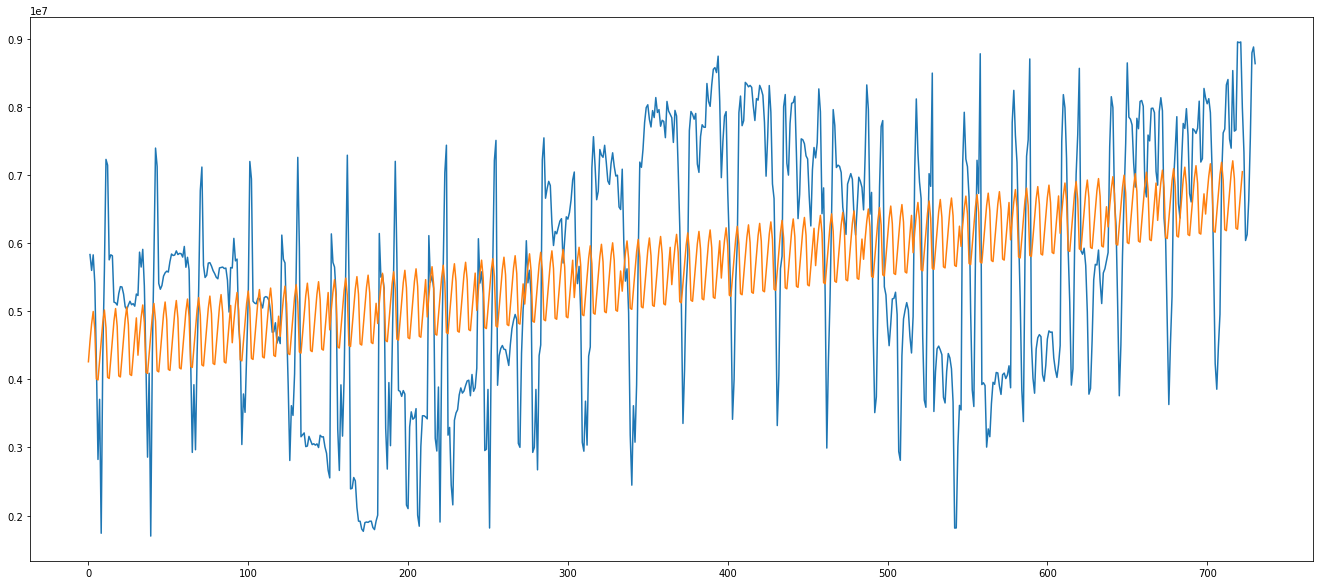

In [18]:
plt.figure(figsize=(23, 10))
plt.plot(data['day_num'], data['target'])
plt.plot(Y_pred)
plt.show()

In [19]:
for i in range(1, 13):
    data['month_' + str(i)] = (data['date'].dt.month == i)
#data = pd.merge(data, data1, on='day_num', how='right')
data

,target,day_num,date,day_1,day_2,day_3,day_4,day_5,day_6,day_7,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Id,,,,,,,,,,,,,,,,,,,,,
1,5830312.0,1,2009-01-01,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5597619.0,2,2009-01-02,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5825879.0,3,2009-01-03,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5410538.0,4,2009-01-04,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,4225877.0,5,2009-01-05,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,6624696.0,726,2010-12-27,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
727,7543819.0,727,2010-12-28,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
728,8790105.0,728,2010-12-29,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [20]:
month_columns = ['month_' + str(i) for i in range(2, 13)]

X1 = data[['day_num'] + day_columns + month_columns]
X_train = X1[X1['day_num'] <= 723]
X_test = X1[X1['day_num'] > 723]
Y_train = data[data['day_num'] <= 723]['target']
Y_test = data[data['day_num'] > 723]['target']


,day_num,day_2,day_3,day_4,day_5,day_6,day_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Id,,,,,,,,,,,,,,,,,,
1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,719,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
720,720,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
721,721,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


/Users/yasen/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yasen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yasen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


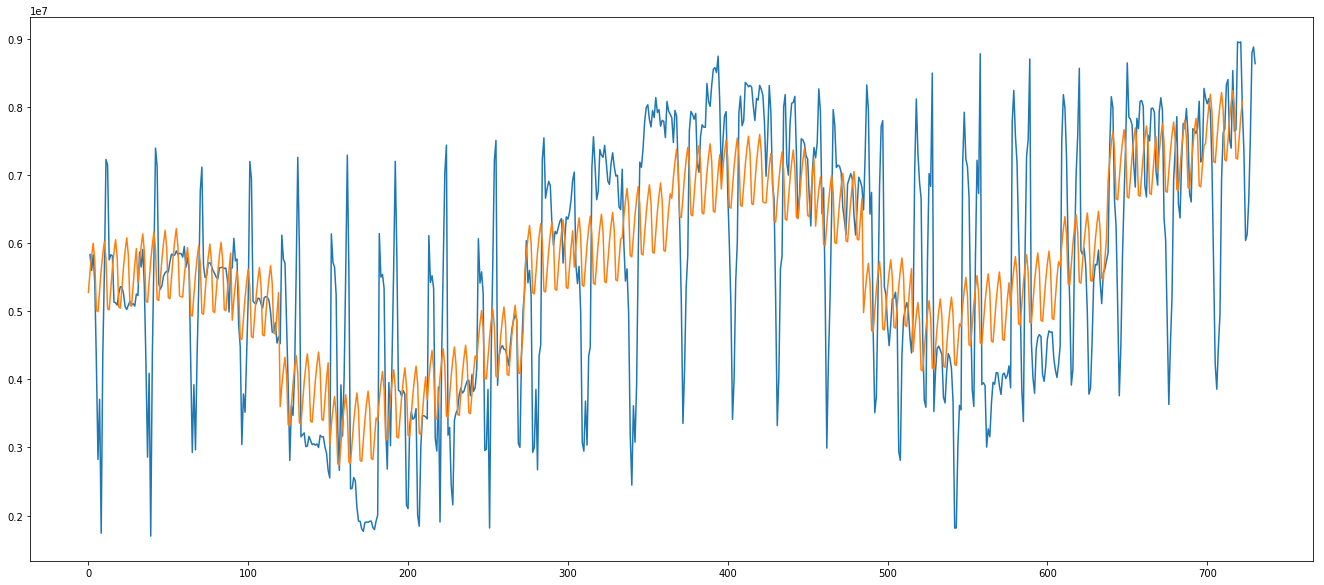

In [26]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

plt.figure(figsize=(23, 10))
plt.plot(data['day_num'], data['target'])
plt.plot(Y_pred)
plt.show()

In [27]:
Y_pred1 = model.predict(X_test)


/Users/yasen/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yasen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yasen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


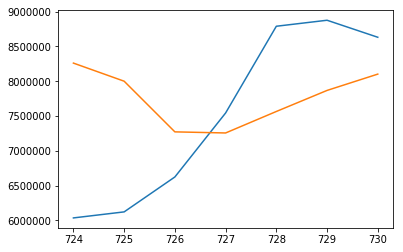

In [28]:
plt.plot(X_test['day_num'], Y_test)
plt.plot(X_test['day_num'], Y_pred1)
plt.show()

In [33]:
print('R^2 для обучающей модели:\t',model.score(X_train, Y_train))
print('R^2 для тестовой модели:\t',model.score(X_test, Y_test))

R^2 для обучающей модели:	 0.48837331364018466
R^2 для тестовой модели:	 -0.22060235794948468


In [32]:
Y_pred1

array([8260668.45352784, 8000583.23247521, 7272658.33773837,
       7256780.4851068 , 7565565.27428568, 7868080.84693526,
       8102487.5267685 ])